## Problem statement



To predict churning out customers

We are going to implement the RandomForestClassifier to customer churn dataset and interpret churning


## Load the dataset

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data=pd.read_csv('customer_churn.csv')

In [3]:
churn_data.head(10)
pd.set_option('display.max_columns', None)
churn_data.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\rawat\AppData\Local\Temp\ipykernel_25684\3622092608.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


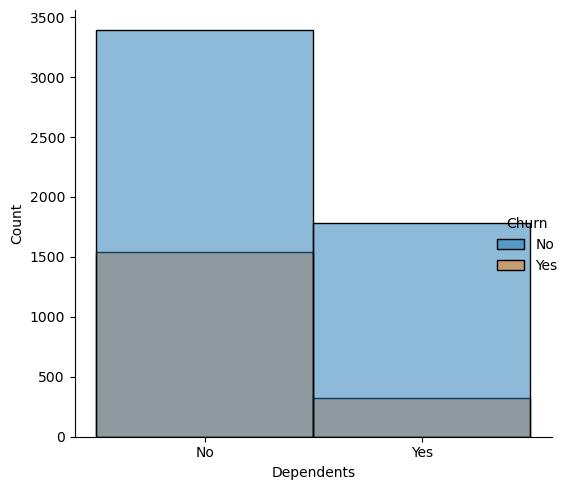

In [6]:
churn_data['TechSupport'].unique()
sns.displot(x='Dependents', data=churn_data, hue='Churn')
plt.tight_layout()

Insights about data:
Imp features: 
1. Streaming Movies has no effect on churn
2. Monthly charges- churn is high for 70 to 110
3. contract- month_to_month has highest churn
4. Fiber optic - churn is highest
5. Senior Citizen- churn is more than 50%
6. Techsupport- with tech support, churn is less
7. Gender has no effect on churn
8. Dependents- Churn is high in No dependents. Not dependents have options

In [ ]:
churn_data['new']=churn_data['MonthlyCharges']*churn_data['tenure']

Converting the Total charges column to numeric,because as you can see its original dtype is object but data is numeric

In [21]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [23]:
bool_series = pd.isnull(churn_data['TotalCharges'])
churn_data[bool_series]
 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## Missing Value Analysis

In [24]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see from above output Total charges is having 11 null values ,as we don't have a appropriate TotalCharges we will be dropping the 11 null value rows in the same data table

In [25]:
churn_data.dropna(inplace=True)
# it could have filled with 'new column' but tenure is zero for so that's y 

In [26]:
churn_data.shape

(7032, 21)

As CustomerId is nowhere helping in the prediction and also it's values are not appropriate to fit in the model we will be droping the Customer ID column

In [27]:
churn_data.drop(columns = ['customerID'],inplace = True)

In [28]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [29]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Label Encoding

Encoding all the labels as numerical categories as because this kinds of string data cannot be used to fit as these are incompatible type to fit the classification model

this can be performed through label_encoder() or using the map() function.

In [30]:

churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
churn_data['gender'] = churn_data['gender'].map({'Female': 1, 'Male': 0})
churn_data['PhoneService'] = churn_data['PhoneService'].map({'Yes': 1, 'No': 0})
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})



In [31]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,0,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,2,0,1,0,1,1,1,1,1,1,0,84.80,1990.50,0
7039,1,0,1,1,72,1,2,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,1,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,1,29.60,346.45,0
7041,0,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,0,74.40,306.60,1


So now after encoding you can check that the dtypes of all the data is numerical where this data fits into any classification probelm perfecty

## Data Visualization

###### 1

Starting with visualizing how many customers have churned out and how many are still in contract with the company

In [32]:
churn_data["Churn"].value_counts(normalize=True)*100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

<Axes: xlabel='Churn'>

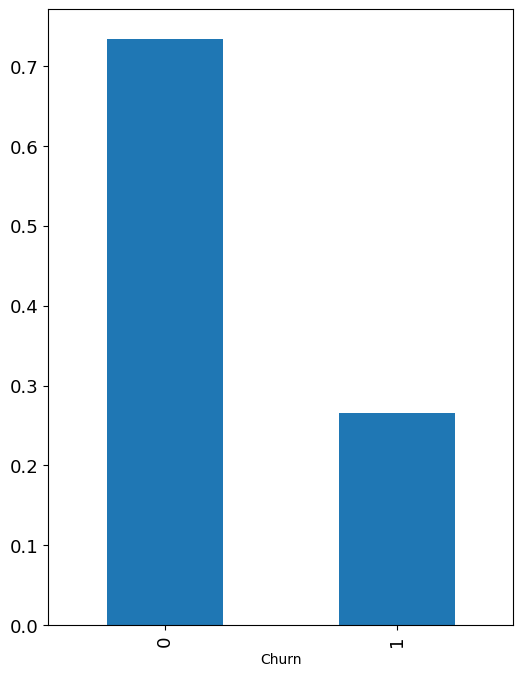

In [33]:
churn_data["Churn"].value_counts(normalize=True).plot(kind='bar', figsize=(6, 8), fontsize=13)

from the above visualization its  clear that 26.58 % of people have churned out and 73.43% people have not churned.

from the below heatmap we can check the correlation between the features

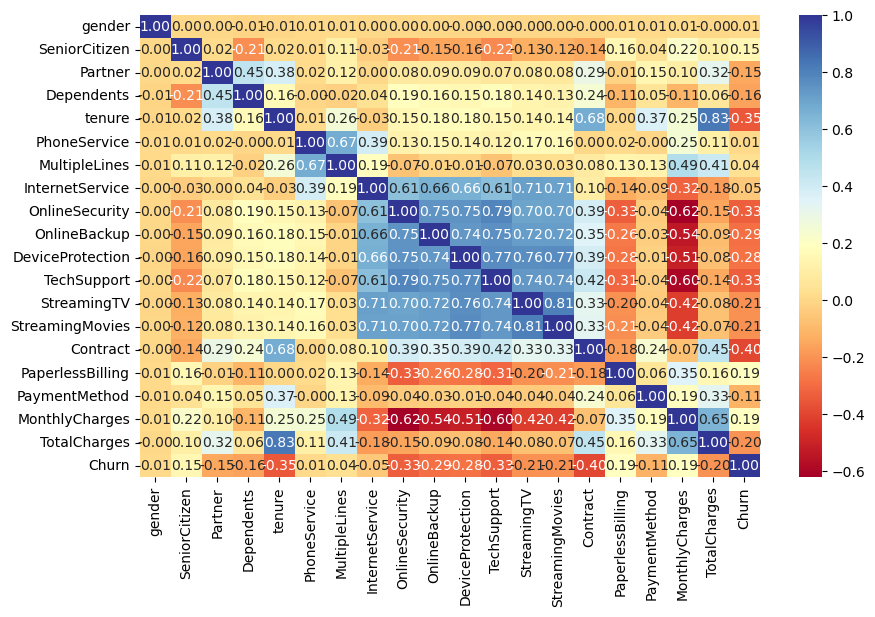

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.heatmap(churn_data.corr(), cmap="RdYlBu", annot=True, fmt=".2f")
plt.show()

we can infer that there are hightly_corr_feature = ["OnlineBackup_No internet service", "StreamingMovies_No internet service", "StreamingTV_No internet service", "TechSupport_No internet service", "DeviceProtection_No internet service", "OnlineSecurity_No internet service"]

# Model building

As our main prediction is to check the churning out customers ,so we consider churn as depended data and all other features are considered as independent (features after feature selection)

In [35]:
X = churn_data.iloc[:, :-1].values
y = churn_data.iloc[:, -1].values

In [36]:
X.shape

(7032, 19)

In [37]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

Splitting the data into train and test data ,as training data will be used for training the model and test data is for prediction.

In [38]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
x_test.shape[0]+x_train.shape[0]

7032

In [40]:
clf = tree.DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)

y_test_pred = clf.predict(x_test)

In [41]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.9978666666666667
Test score 0.7377398720682303


Now we will fit the data into RandomForestClassifier ,As random forest is  ensemble method .we will be importing RandomForestClassifier from sklearn's ensemble library

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 45)

rf=rf.fit(x_train,y_train)

y_train_pred = rf.predict(x_train)

y_test_pred = rf.predict(x_test)

In [43]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.9978666666666667
Test score 0.7910447761194029


# Hyper parameter tuning

There are two techniques for hyper parameter tuning :
    1.RandomizedSearchCV
    2.GridSearchCV
    
For our model we will be implementing  RandomizedSearchCV method and tune our model

So we'll select the best values for each parameter ,below code help's  us to extract the best values for each parameter

In [65]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# n_estimators = [10,50,100,200,500,1000,1500,2000,5000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','0.5','0.7']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', '0.5', '0.7'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100,
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf2=rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [39]:
rf2.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [67]:
rf2 = RandomForestClassifier(n_estimators= 1400,
 min_samples_split =  10,
 min_samples_leaf=2,
 max_features='auto',
 max_depth=10,
 bootstrap= False)

rf2= rf2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


from the above fitted model we can check the best values for each parameter across 100 folds

So after hyperparameter tuning ,we have fitted the model with best parameters and the best value.

lets check the predictions for the model fitted after tuning

In [68]:
y_train_pred = rf2.predict(x_train)

y_test_pred = rf2.predict(x_test)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.8775111111111111
Test score 0.7967306325515281


So from the below outup we can see there is a 1.28% change in accuracy .

after implementation of  hyper parameter tuning to the model, we can see that there is increase in performance of the model

# Model Evaluation

We'll check the feature importance of the fitted model .where feature importance helps the contribution of each and every features for the built model

In [42]:
importance = rf2.feature_importances_

In [70]:
importance= pd.Series(importance)
importance

0     0.008870
1     0.014627
2     0.008326
3     0.010543
4     0.165741
5     0.003804
6     0.016981
7     0.052060
8     0.079271
9     0.030413
10    0.021502
11    0.065500
12    0.017524
13    0.019016
14    0.162806
15    0.020131
16    0.038877
17    0.115465
18    0.148542
dtype: float64

In [44]:
df=pd.DataFrame(columns=['Feature','Importance'])

In [45]:
cols = list(churn_data.drop('Churn',axis=1).columns)
df['Feature']=cols
df['Importance']=importance


In [71]:
df

,Feature,Importance
0,gender,0.008870
1,SeniorCitizen,0.014627
2,Partner,0.008326
3,Dependents,0.010543
4,tenure,0.165741
5,PhoneService,0.003804
6,MultipleLines,0.016981
7,InternetService,0.052060
8,OnlineSecurity,0.079271
9,OnlineBackup,0.030413


In [72]:
df.sort_values(by='Importance', ascending=False)

,Feature,Importance
4,tenure,0.165741
14,Contract,0.162806
18,TotalCharges,0.148542
17,MonthlyCharges,0.115465
8,OnlineSecurity,0.079271
11,TechSupport,0.065500
7,InternetService,0.052060
16,PaymentMethod,0.038877
9,OnlineBackup,0.030413
10,DeviceProtection,0.021502


<Axes: xlabel='Feature', ylabel='Importance'>

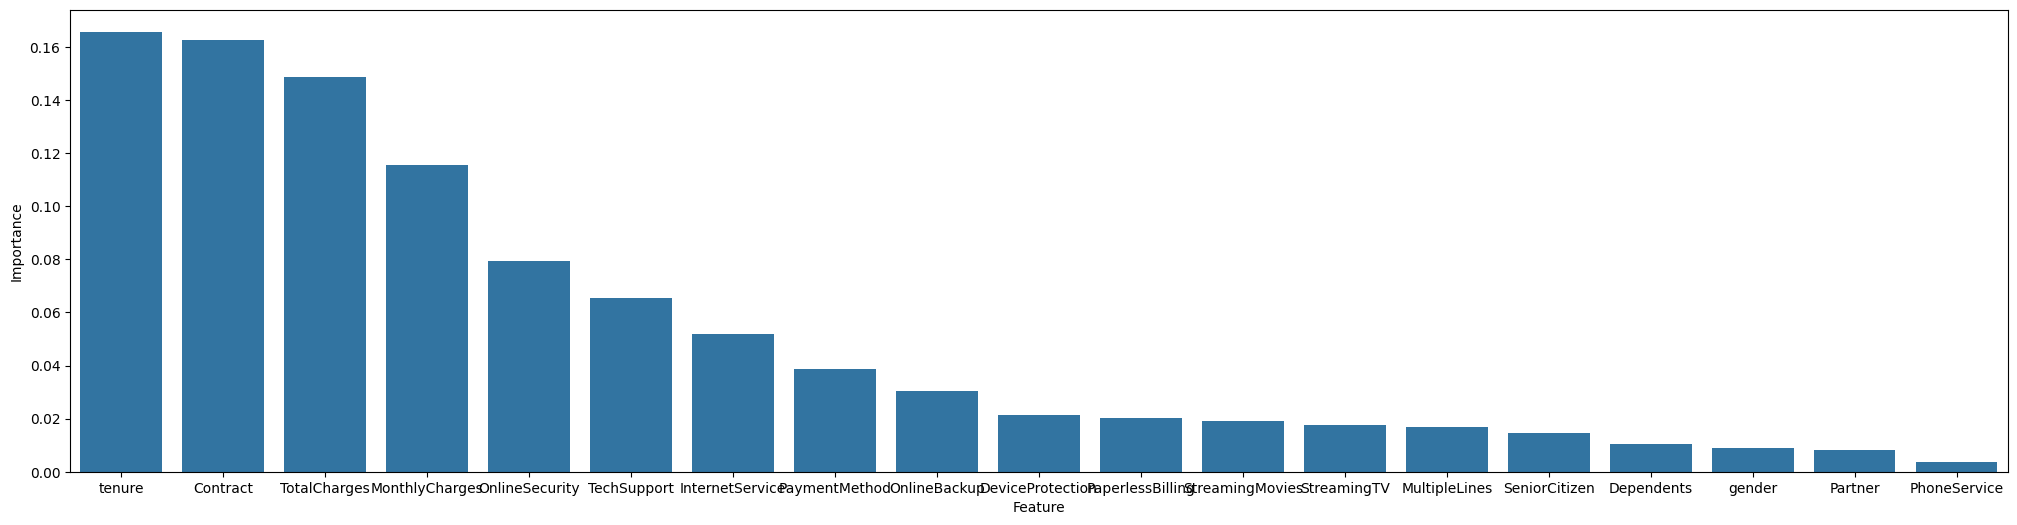

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
# make barplot and sort bars
sns.barplot(x='Feature',y="Importance",data=df, order=df.sort_values('Importance', ascending=False).Feature)

From the above  plot we can infer that there is only few colums which have more contribution for prediction

### classification_report


classification_report helps us to evaluate the model, so from classification_report we can evaluate the model performence in micro level

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.65      0.49      0.56       369

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [51]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4125
           1       0.83      0.69      0.75      1500

    accuracy                           0.88      5625
   macro avg       0.86      0.82      0.84      5625
weighted avg       0.88      0.88      0.88      5625



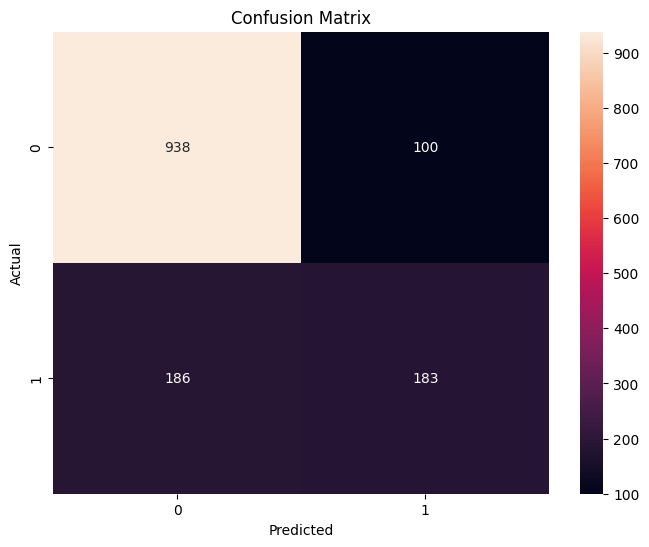

In [74]:
# prompt: create code for confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=churn_data["Churn"].unique(), yticklabels=churn_data["Churn"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
